In [100]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [78]:
%ls '../data'

'ANSI_B18.6.3 History.xlsx'		   open_order_report.csv
 BlackFriday.csv*			   part_usage_trailing_12.xlsx
 Domestic.xlsx				   price_list.csv
 GradeARestaurantsManhattan/		   purchases_by_vendor.xlsx
 International.xlsx			   sales_data_sample.csv
 customer_data.xlsx			   sales_data_sample.xlsx
 government_purchase_orders.csv		   sales_data_sample_no_customer.xlsx
 inventory_list.csv			   sales_encryption.csv
 item_purchases.csv			   screw_corpus.xml
'line measurements - with problems.xlsx'   suppliers.xlsx
'line measurements.xlsx'		   transactions.csv
 open_order.xlsx			   wiki/


In [79]:
trans = pd.read_csv('../data/sales_data_sample.csv')

In [80]:
trans.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/03 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/03 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/03 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/03 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/03 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [81]:
trans.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [82]:
trans.shape

(2823, 25)

In [84]:
trans['DATE'] = pd.to_datetime(trans['ORDERDATE'])
trans = trans.set_index(trans['DATE'])

In [86]:
monthly_data = trans.resample('M').sum()
monthly_data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
DATE,,,,,,,,,
2003-01-31,394008,1357,3203.31,250,129753.60,39,39,78117,3950
2003-02-28,414339,1449,3441.55,327,140836.19,41,82,82123,4038
2003-03-31,505484,1755,4086.67,327,174504.90,50,150,100150,5003
2003-04-30,586819,1993,4925.11,375,201609.55,116,232,116174,5810
2003-05-31,587175,2017,4753.17,425,192673.11,116,290,116174,5900


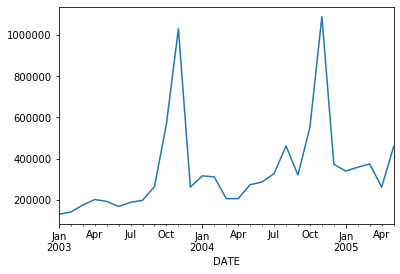

In [87]:
monthly_data['SALES'].plot()

# Seasonality

In [112]:
trans['month'] = trans['DATE'].map(lambda x: x.month)

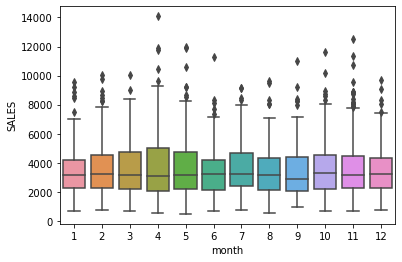

In [113]:
sns.boxplot(data=trans, x='month', y='SALES')

# Weekly Seasonality

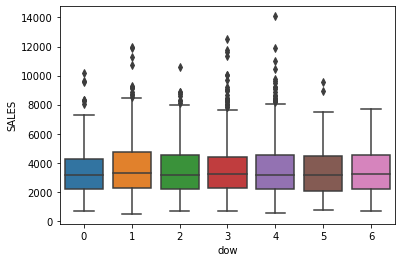

In [115]:
trans['dow'] = trans['DATE'].map(lambda x: x.dayofweek)
sns.boxplot(data=trans, x='dow', y='SALES')